In [1]:
import mysql.connector
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
import seaborn as sns
import json

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Mala2ki7!",
    database="userDB"
)

df = pd.read_sql('SELECT * FROM reaction_info', con=mydb)

user_id_start = 91
df = df[(df.id >= user_id_start) | (df.id == 0)].drop_duplicates()

question_columns = list(df.columns[4:-2])
columns = list(df.columns)
columns

['id', 'switch_type', 'srt', 'dpt']

In [5]:
df["avg_srt"] = np.nan
df["avg_dpt"] = np.nan
for id in list(set(df.id)):
    for switch_type in list(set(df[df.id == id].switch_type)):
        srts = json.loads(df[(df.id == id) & (df.switch_type == switch_type)].srt.values[0])
        dpts = json.loads(df[(df.id == id) & (df.switch_type == switch_type)].dpt.values[0])
        
        df.loc[(df.id == id) & (df.switch_type == switch_type), 'avg_srt'] = np.average(srts)
        df.loc[(df.id == id) & (df.switch_type == switch_type), 'avg_dpt'] = np.average(dpts)
df = df.replace({'motion': 'webcam'})
df = df.replace({'face': 'webcam'})


In [6]:
koester_df = pd.read_excel('D:/Users/nickb/PycharmProjectsD/NomonWeb/data_processing/koester_data.xlsx', sheetname='Sheet1')
koester_srts = koester_df[koester_df.phase == 1]["avgResponseTime"].values
koester_dpts = (koester_df[koester_df.phase == 2]["avgTrialTime"] - koester_df[koester_df.phase == 2]["avgResponseTime"]).values
koester_mi = koester_df[koester_df.phase == 1]["MI"].values

koester_df = pd.DataFrame(np.vstack([koester_srts, koester_dpts, koester_mi]).T, columns=["SRT", "DPT", "MI"])

c:\users\nickb\appdata\local\programs\python\python36\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


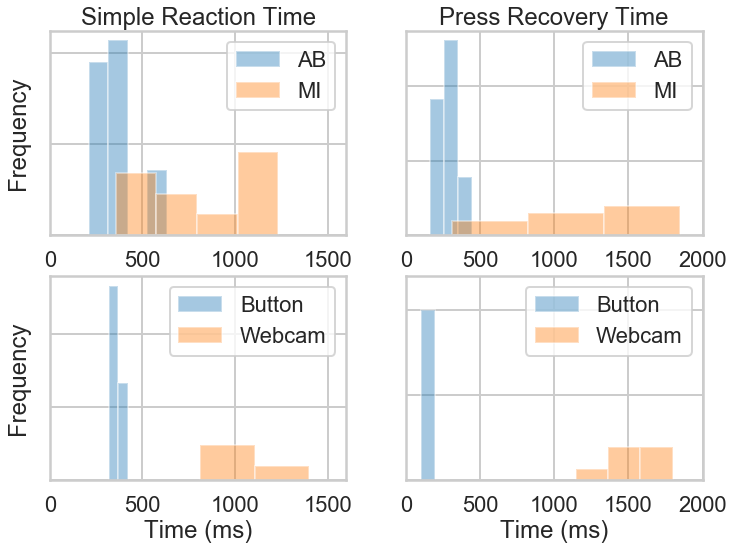

In [7]:
sns.set_context("poster")
sns.set_style("whitegrid")
fig, ((ax_top_left, ax_top_right),(ax_bottom_left, ax_bottom_right)) = plt.subplots(nrows=2, ncols=2, figsize=(11.7, 8.27))
# fig.tight_layout()

# srts
sns.distplot(koester_df[koester_df.MI ==  0].SRT, bins=4, kde=False, norm_hist=True, ax=ax_top_left, label="AB")
sns.distplot(koester_df[koester_df.MI ==  1].SRT, bins=4, kde=False, norm_hist=True, ax=ax_top_left, label="MI")
ax_top_left.set_xlim(0, 1600)
ax_top_left.set_yticklabels([])
ax_top_left.set_xlabel('')
ax_top_left.set_ylabel('Frequency')
ax_top_left.legend()
ax_top_left.set_title("Simple Reaction Time")

sns.distplot(df[df.switch_type == "button"].avg_srt, bins=2, kde=False, norm_hist=True, ax=ax_bottom_left, label="Button")
sns.distplot(df[df.switch_type == "webcam"].avg_srt, bins=2, kde=False, norm_hist=True, ax=ax_bottom_left, label="Webcam")
ax_bottom_left.set_xlim(0, 1600)
ax_bottom_left.set_yticklabels([])
ax_bottom_left.set_xlabel('Time (ms)')
ax_bottom_left.set_ylabel('Frequency')
ax_bottom_left.legend()

# dpts
sns.distplot(koester_df[koester_df.MI ==  0].DPT, bins=3, kde=False, norm_hist=True, ax=ax_top_right, label="AB")
sns.distplot(koester_df[koester_df.MI ==  1].DPT, bins=7, kde=False, norm_hist=True, ax=ax_top_right, label="MI")
ax_top_right.set_xlim(0, 2000)
ax_top_right.set_yticklabels([])
ax_top_right.set_xlabel('')
ax_top_right.legend()
ax_top_right.set_title("Press Recovery Time")

sns.distplot(df[df.switch_type == "button"].avg_dpt, bins=range(100, 400, 100), kde=False, norm_hist=True,
             ax=ax_bottom_right, label="Button")
sns.distplot(df[df.switch_type == "webcam"].avg_dpt, bins=3, kde=False, norm_hist=True, ax=ax_bottom_right, label="Webcam")
ax_bottom_right.set_xlim(0, 2000)
ax_bottom_right.set_ylim(0, 0.012)
ax_bottom_right.set_yticklabels([])
ax_bottom_right.set_xlabel('Time (ms)')
ax_bottom_right.legend()
